In [ ]:
import matplotlib.pyplot as plt
import torch

from render import initialize_scene

In [2]:
colmap_path = "../data/360-extra/treehill/sparse/0"
image_num = 100  # Index of the image to render

# Initialize scene
scene = initialize_scene(colmap_path)

/home/kafka/others/code/3dgs-intro/new/render.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.Tensor(all_points3d), torch.Tensor(all_point_colors)


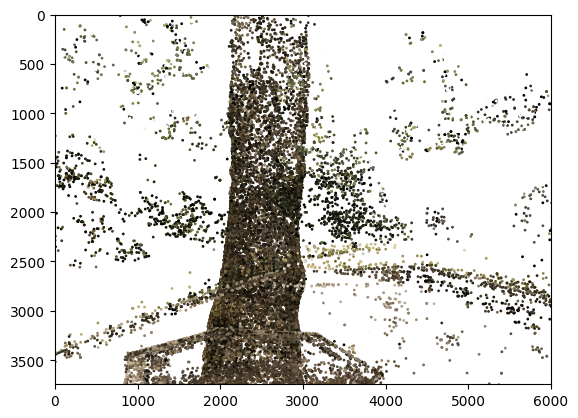

In [3]:
# show all points in the scene
processed_scene = scene.preprocess(image_num)
plt.scatter(
    processed_scene.points_xy[:, 0].detach().cpu(),
    processed_scene.points_xy[:, 1].detach().cpu(),
    c=processed_scene.colors.detach().cpu(),
    s=1,
)
plt.xlim(0, 6000)
plt.ylim(0, 3744)
plt.gca().invert_yaxis()

100%|██████████| 316/316 [17:51<00:00,  3.39s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..234.25061].


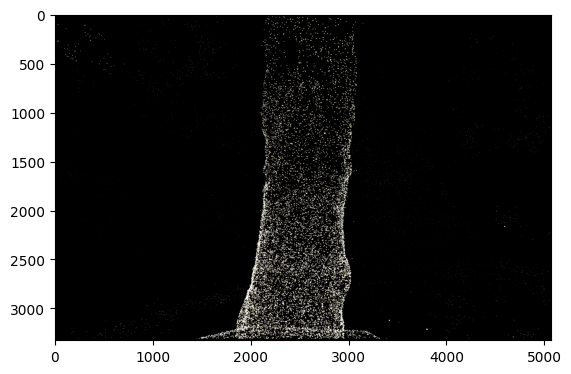

In [ ]:
# render scene 
with torch.no_grad():
    rendered_image = scene.render_image(image_idx=image_num)

plt.imshow(rendered_image.cpu().detach().transpose(0, 1) * 255)
plt.show()